# SHAP values for categorical features with CatBoost
<br>
<b>Dataset:</b> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

import shap
#%shap.initjs()

from sklearn.metrics import accuracy_score,confusion_matrix


path = "//Users/conorosully/Google Drive/My Drive/Medium/7 In Progress/SHAP catboost/{}"


Bad key text.latex.preview in file /Users/conorosully/miniconda3/envs/Python3.7/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/conorosully/miniconda3/envs/Python3.7/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/conorosully/miniconda3/envs/Python3.7/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('save

In [3]:
#load data 
data = pd.read_csv("../../../data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X = data.drop('class', axis=1)


print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
model.fit(X, y, cat_features)

#Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

0:	learn: 0.6660194	total: 79.8ms	remaining: 1.51s
1:	learn: 0.6373576	total: 86.5ms	remaining: 778ms
2:	learn: 0.6125475	total: 92.8ms	remaining: 526ms
3:	learn: 0.5880232	total: 98.3ms	remaining: 393ms
4:	learn: 0.5652512	total: 103ms	remaining: 310ms
5:	learn: 0.5428184	total: 109ms	remaining: 254ms
6:	learn: 0.5222711	total: 116ms	remaining: 215ms
7:	learn: 0.5016943	total: 121ms	remaining: 182ms
8:	learn: 0.4779907	total: 127ms	remaining: 155ms
9:	learn: 0.4601680	total: 132ms	remaining: 132ms
10:	learn: 0.4447001	total: 137ms	remaining: 112ms
11:	learn: 0.4281286	total: 145ms	remaining: 96.8ms
12:	learn: 0.4125468	total: 151ms	remaining: 81.1ms
13:	learn: 0.3990776	total: 156ms	remaining: 66.7ms
14:	learn: 0.3861614	total: 161ms	remaining: 53.6ms
15:	learn: 0.3724813	total: 166ms	remaining: 41.5ms
16:	learn: 0.3560532	total: 172ms	remaining: 30.4ms
17:	learn: 0.3448969	total: 178ms	remaining: 19.7ms
18:	learn: 0.3331749	total: 183ms	remaining: 9.64ms
19:	learn: 0.3218024	total: 1

0.9852289512555391

# Standard SHAP values

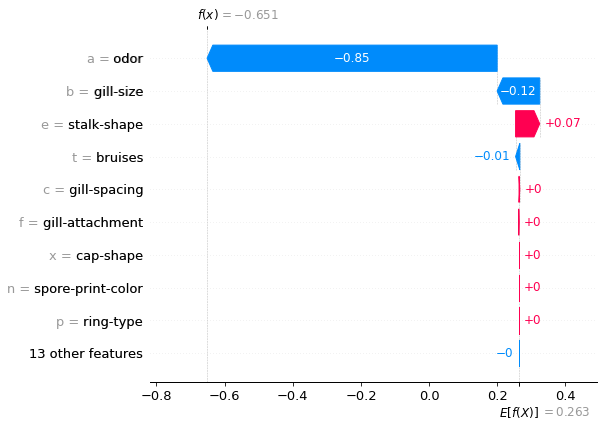

In [5]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[1],show=False)

plt.savefig(path.format('waterfall.png'),dpi=100,bbox_inches='tight', facecolor='white')

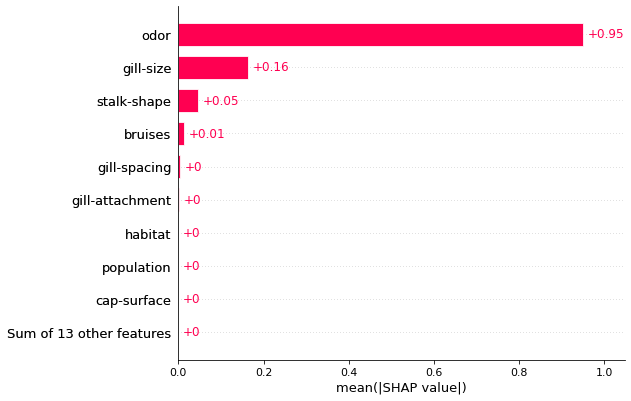

In [9]:
#Mean SHAP
shap.plots.bar(shap_values,show=False)

plt.savefig(path.format('mean_shap.png'),dpi=100,bbox_inches='tight', facecolor='white')

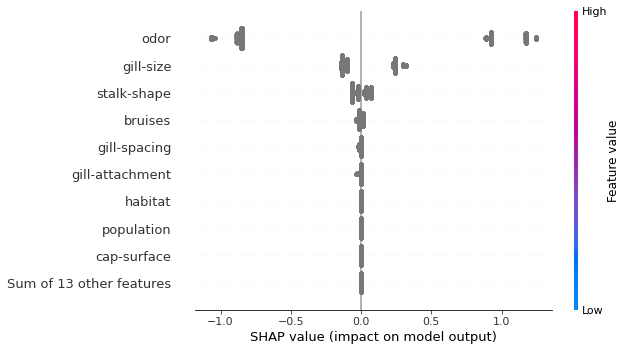

In [69]:
shap.plots.beeswarm(shap_values ,show=False)

plt.savefig(path.format('beeswarm.png'),dpi=100,bbox_inches='tight', facecolor='white')

In [6]:
shap_values 

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

.base_values =
array([0.2629663, 0.2629663, 0.2629663, ..., 0.2629663, 0.2629663,
       0.2629663])

.data =
array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

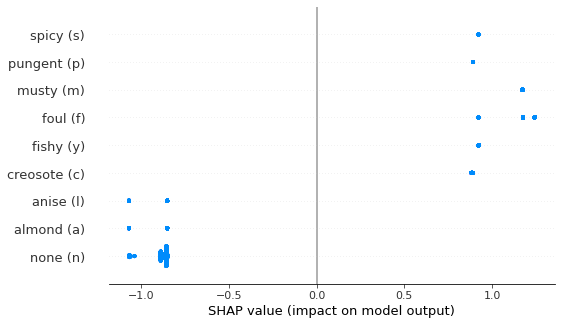

In [9]:
#Create for placeholder SHAP values
shap_values_odor = explainer(X)

#Get shaply values and feature values for odor
odor_values = np.array(shap_values[:,4].values) 
odor_data = X['odor']

#Create new SHAP values array

#Split odor SHAP values by unique odor categories
unique_odor = ['a','l','c','y','f','m','n','p','s']
new_shap_values = [np.array(pd.Series(odor_values)[odor_data==odor]) for odor in unique_odor]

#Each sublist needs to be the same length
max_len = max([len(v) for v in new_shap_values])
new_shap_values = [np.append(vs,[np.nan]*(max_len - len(vs))) for vs in new_shap_values]
new_shap_values = np.array(new_shap_values)

#transpost matrix so categories are columns and SHAP values are rows
new_shap_values = new_shap_values.transpose()

#replace shap values
shap_values_odor.values = np.array(new_shap_values)

#replace data with placeholder array
shap_values_odor.data = np.array([[0]*len(unique_odor)]*max_len)

#replace base data with placeholder array
shap_values_odor.base = np.array([0]*max_len)

#replace feature names with category labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}
labels = ["{} ({})".format(odor_labels[u],u) for u in unique_odor]
shap_values_odor.feature_names = list(labels)

#Use besswarm as before
shap.plots.beeswarm(shap_values_odor,color_bar=False,show=False)

plt.savefig(path.format('beeswarm_odor.png'),dpi=100,bbox_inches='tight', facecolor='white')

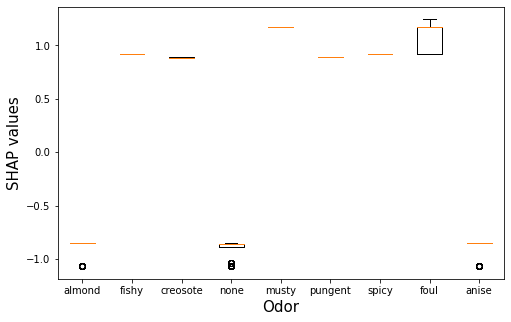

In [11]:
#get shaply values and data
odor_values = shap_values[:,4].values
odor_data = X['odor']
unique_odor = set(X['odor'])

#split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
#replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('SHAP values',size=15)
plt.xlabel('Odor',size=15)

plt.savefig(path.format('boxplot.png'),dpi=100,bbox_inches='tight', facecolor='white')